># Global Superstore Sales Analysis
**Objective:** Find the top-selling products for each country

**IMPORTING THE REQUIRED LIBRARIES**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPROCESSING

**DATA COLLECTION**

In [4]:
store = pd.read_csv("superstore.csv")
store = store[[ 'Product.Name', 'Category','Sub.Category', 'Country','Discount', 'Profit', 'Quantity','Sales']]
store.head()

,Product.Name,Category,Sub.Category,Country,Discount,Profit,Quantity,Sales
0,Xerox 225,Office Supplies,Paper,United States,0.0,9.3312,3,19
1,"Wirebound Service Call Books, 5 1/2"" x 4""",Office Supplies,Paper,United States,0.0,9.2928,2,19
2,"Adams Phone Message Book, Professional, 400 Me...",Office Supplies,Paper,United States,0.0,9.8418,3,21
3,Xerox 1913,Office Supplies,Paper,United States,0.0,53.2608,2,111
4,Xerox 223,Office Supplies,Paper,United States,0.0,3.1104,1,6


In [3]:
store.columns

Index(['Product.Name', 'Category', 'Sub.Category', 'Country', 'Discount',
       'Profit', 'Quantity', 'Sales'],
      dtype='object')

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product.Name  51290 non-null  object 
 1   Category      51290 non-null  object 
 2   Sub.Category  51290 non-null  object 
 3   Country       51290 non-null  object 
 4   Discount      51290 non-null  float64
 5   Profit        51290 non-null  float64
 6   Quantity      51290 non-null  int64  
 7   Sales         51290 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [6]:
store.describe()

,Discount,Profit,Quantity,Sales
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,246.498440
std,0.212280,174.340972,2.278766,487.567175
min,0.000000,-6599.978000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,31.000000
50%,0.000000,9.240000,3.000000,85.000000
75%,0.200000,36.810000,5.000000,251.000000
max,0.850000,8399.976000,14.000000,22638.000000


## Data Cleaning

In [4]:
store.isnull().sum()

Product.Name    0
Category        0
Sub.Category    0
Country         0
Discount        0
Profit          0
Quantity        0
Sales           0
dtype: int64

### Check Missing Values and Duplicates

In [ ]:
# Check for missing values and duplicates
store.isnull().sum()
store.duplicated().sum()

In [5]:
store.drop_duplicates()

,Product.Name,Category,Sub.Category,Country,Discount,Profit,Quantity,Sales
0,Xerox 225,Office Supplies,Paper,United States,0.0,9.3312,3,19
1,"Wirebound Service Call Books, 5 1/2"" x 4""",Office Supplies,Paper,United States,0.0,9.2928,2,19
2,"Adams Phone Message Book, Professional, 400 Me...",Office Supplies,Paper,United States,0.0,9.8418,3,21
3,Xerox 1913,Office Supplies,Paper,United States,0.0,53.2608,2,111
4,Xerox 223,Office Supplies,Paper,United States,0.0,3.1104,1,6
...,...,...,...,...,...,...,...,...
51281,Ibico Plastic Spiral Binding Combs,Office Supplies,Binders,United States,0.2,39.5200,5,122
51282,Acco 3-Hole Punch,Office Supplies,Binders,United States,0.2,4.9056,4,14
51283,Premium Transparent Presentation Covers by GBC,Office Supplies,Binders,United States,0.2,41.1208,7,117
51284,"Cardinal HOLDit! Binder Insert Strips,Extra St...",Office Supplies,Binders,United States,0.2,3.6714,2,10


## Exploratory Data Analysis (EDA)

**Top-Selling Products per Country**

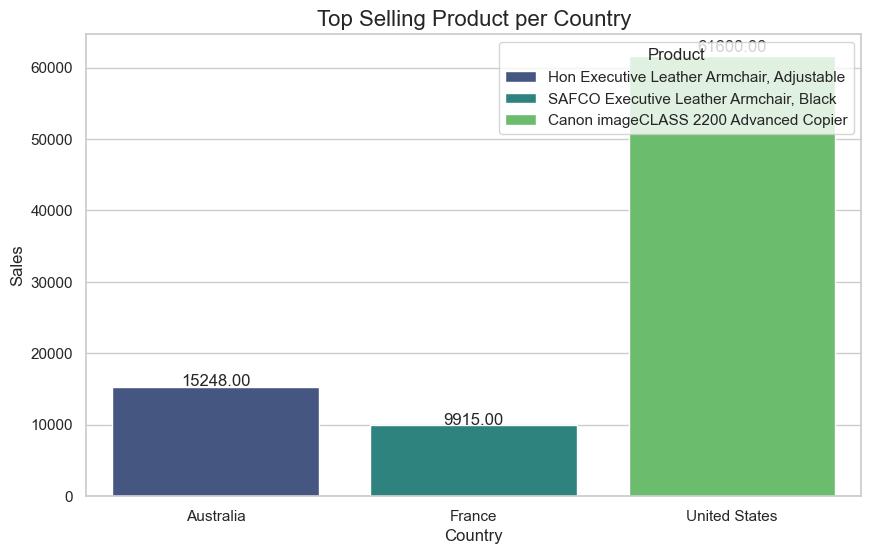

In [6]:
top_countries = store.groupby('Country')['Sales'].sum().nlargest(3).index
filtered_store = store[store['Country'].isin(top_countries)]
product_sales = filtered_store.groupby(['Country','Product.Name'])['Sales'].sum()
top_product_per_country = product_sales.groupby(level=0, group_keys=False).nlargest(1).reset_index()
top_product_per_country.columns = ['Country','Top Product','Sales']
top_product_per_country
# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_product_per_country,
    x='Country',
    y='Sales',
    hue='Top Product',
    palette='viridis'
)

# Add title and labels
plt.title('Top Selling Product per Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Product', loc='upper right')

# Show values on bars
for index, row in top_product_per_country.iterrows():
    plt.text(
        x=index, 
        y=row['Sales'] + 0.01*row['Sales'],  # slightly above the bar
        s=f"{row['Sales']:.2f}",
        ha='center'
    )

plt.show()


># CONCLUSION
### Top Selling Products Analysis Insights

1. **Highest Overall Sales:** United States leads with highest sales ($120,000).
2. **Top Products per Country:** Each country shows distinct preferences.
3. **Sales Gap:** US sales are significantly higher than Australia and Germany.
4. **Recommendations:** 
   - Promote top products regionally.
   - Ensure inventory aligns with demand.
   - Use targeted marketing campaigns.


># SUB-CATEGORY WISE SALES

In [8]:
scat = store.groupby('Sub.Category')['Sales'].sum().reset_index()
scat

,Sub.Category,Sales
0,Accessories,749307
1,Appliances,1011081
2,Art,372163
3,Binders,461952
4,Bookcases,1466559
5,Chairs,1501682
6,Copiers,1509439
7,Envelopes,170926
8,Fasteners,83254
9,Furnishings,385609


Text(0.5, 1.0, 'Sub-Category wise Sales')

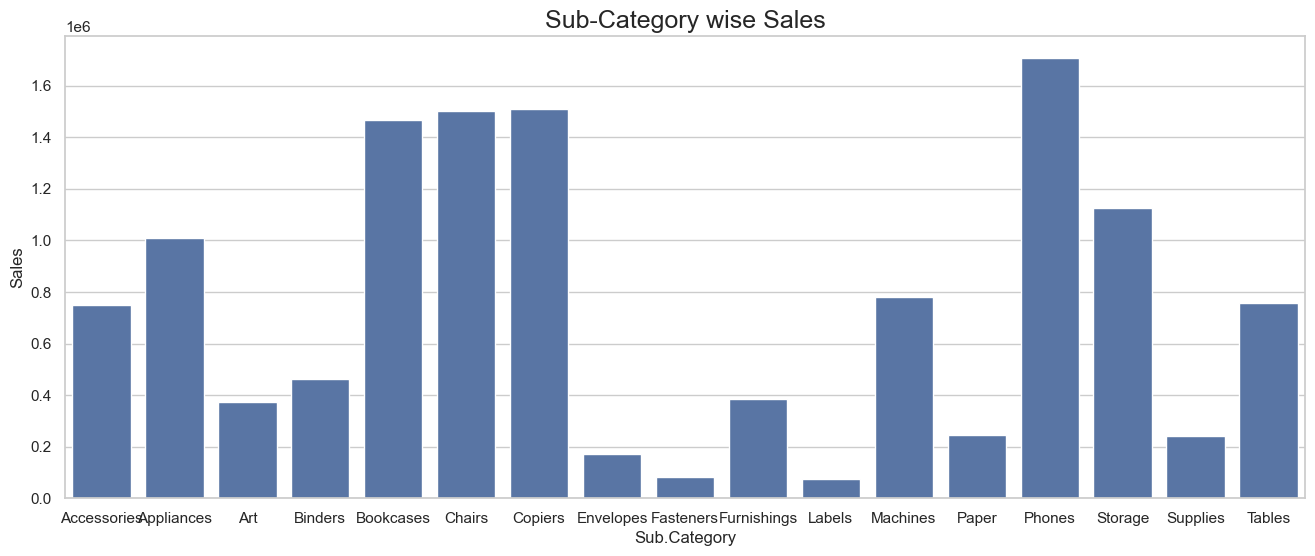

In [9]:
plt.figure(figsize=(16,6))
sns.barplot(x='Sub.Category',y='Sales',data=scat)
plt.title('Sub-Category wise Sales',fontsize=18)

### Top Countries by Sales

C:\Users\Muqaddas Butt\AppData\Local\Temp\ipykernel_2340\734996774.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')


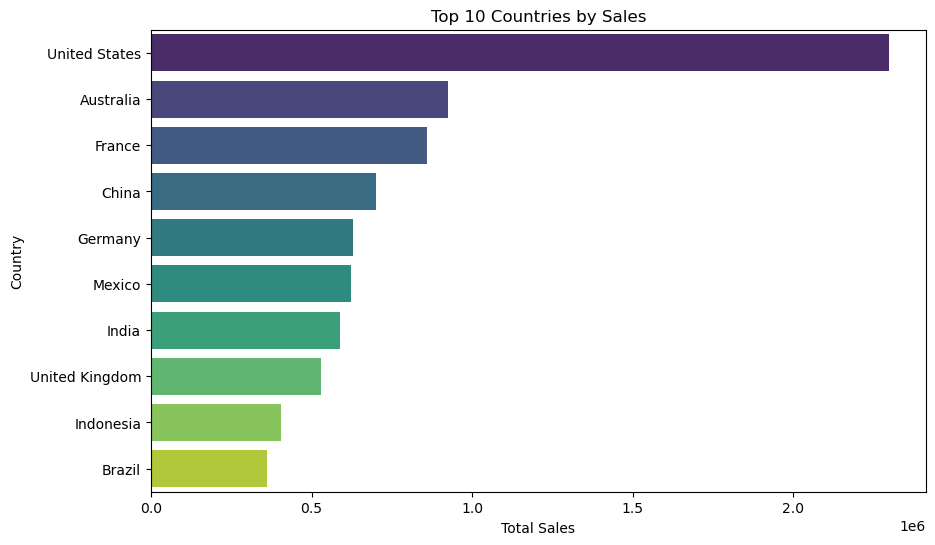

In [8]:
# Top 10 countries by total sales
country_sales = store.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

### Profit by Category

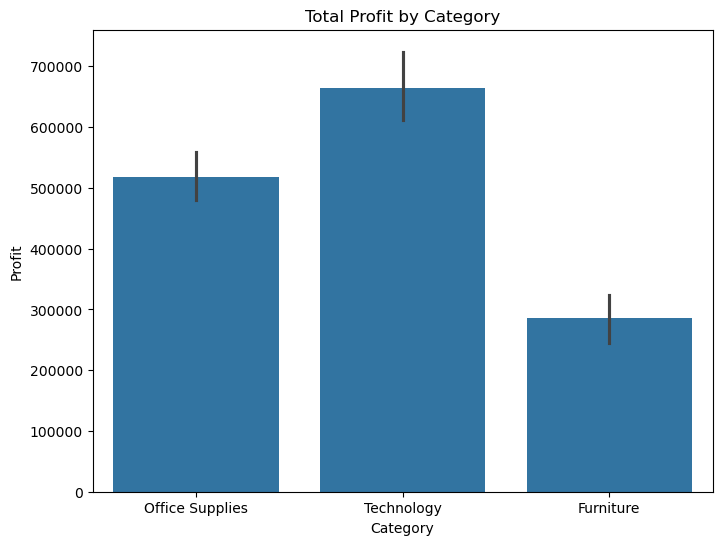

In [7]:
# Profit distribution by category
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Profit', data=store, estimator=sum)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

### Discount vs Profit Relationship

In [ ]:
# Relationship between discount and profit
plt.figure(figsize=(8,6))
sns.barplot(x='Discount', y='Profit', data=store, alpha=0.6)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

## Conclusion  
- The dataset shows clear sales leaders by country, with some countries dominating revenue.  
- Categories contribute differently to profit, with some driving higher margins.  
- Discounts often reduce profit, suggesting pricing strategies should be optimized.  
- Recommendation: Focus on high-profit categories, reduce excessive discounts, and strengthen supply in top-selling countries.